Take 3 data sets including 'Energy Indicators.xls', 'world_bank.csv', and 'scimagojr-3.xlsx'. Clean and manipulate them, then merge them into a new data frame. Analyze the new data frame to undestand more about Top15 countries in 5 continents in terms of GDP, population, Energy Supply, % Renewable, Energy Supply per Capita, citable documents per capita. 

In [1]:
import pandas as pd
import numpy as np

Question 1.

Part a - Load Energy Indicators.xls file, exclude the footer and header info; Get rides of the first two columns.change the column labels. Convert Energy Supply to gigajoules (1,000,000 gigajoules= a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values. Rename the following list of countries. several countries with numbers and/or parenthesis in their name, remove them.

Part b - load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank.

Part c - load file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. only the top 15 countries.

Part d - Join the 3 data sets,the index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

In [2]:
def answer_one():
    energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38, usecols='C:F')
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']


    energy.loc[energy['Energy Supply']=='...']=np.NaN
    energy['Energy Supply']=energy['Energy Supply']*10**6

    energy['Country']=energy['Country'].str.replace (r"[0-9]","")


    import re
    replace_dict={"Republic of Korea": "South Korea","United States of America":"United States",
              "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
              "China, Hong Kong Special Administrative Region": "Hong Kong", 
              'Iran (Islamic Republic of)':'Iran',
              "Hong Kong SAR, China": "Hong Kong"}
    energy['Country']=energy['Country'].replace (to_replace=replace_dict)



    energy['Country']=energy['Country'].str.replace (r"\(.*\)","")
    energy=energy.set_index('Country')
    
    
    GDP=pd.read_csv ('world_bank.csv',skiprows=4)

    replace_dict={"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}
    GDP['Country Name'].replace (to_replace=replace_dict, inplace=True)

    columns_to_key=['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'] 
    GDP=GDP[columns_to_key]

    GDP=GDP.rename(columns={'Country Name' : 'Country'})
    GDP=GDP.set_index('Country')

    scimEn=pd.read_excel('scimagojr-3.xlsx', header=0)
    scimEn=scimEn.head(15).set_index('Country')

    df=pd.merge (scimEn,energy, how='inner',left_index=True,right_index=True)
    df_inner=pd.merge (df,GDP, how='inner',left_index=True,right_index=True)

    return df_inner

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5386000000,231,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,12149000000,59,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13,8896,8819,57470,19125,6.46,72,9172000000,119,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Italy,11,10964,10794,111850,26661,10.20,106,6530000000,109,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


In [3]:
Top15 = answer_one()
Top15.shape

(15, 20)

Question 2. 

The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

In [4]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [5]:
def answer_two():
    Top15 = answer_one()
    
    energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38, usecols='C:F')
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.loc[energy['Energy Supply']=='...']=np.NaN
    energy['Energy Supply']=energy['Energy Supply']*10**6
    energy['Country']=energy['Country'].str.replace (r"[0-9]","")
    import re
    replace_dict={"Republic of Korea": "South Korea","United States of America":"United States",
              "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
              "China, Hong Kong Special Administrative Region": "Hong Kong", 
              'Iran (Islamic Republic of)':'Iran',
              "Hong Kong SAR, China": "Hong Kong"}
    energy['Country']=energy['Country'].replace (to_replace=replace_dict)
    energy['Country']=energy['Country'].str.replace (r"\(.*\)","")
    energy=energy.set_index('Country')
    
    GDP=pd.read_csv ('world_bank.csv',skiprows=4)
    replace_dict={"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}
    GDP['Country Name'].replace (to_replace=replace_dict, inplace=True)
    columns_to_key=['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'] 
    GDP=GDP[columns_to_key]
    GDP=GDP.rename(columns={'Country Name' : 'Country'})
    GDP=GDP.set_index('Country')
   
    scim=pd.read_excel('scimagojr-3.xlsx', header=0)
    scim=scim.reset_index().dropna()
    scim=scim.set_index('Country')
    
    df_total=pd.merge (scim,energy, how='inner',left_index=True,right_index=True)
    df_inner_total=pd.merge (df_total,GDP, how='inner',left_index=True,right_index=True)
    
    return len(df_inner_total)-len(Top15)
answer_two()


145

Question 3. 

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.

In [6]:
def answer_three():
    Top15 = answer_one()
    
    years=np.arange(2006,2016).astype(str)
    Top15=Top15[years]
    Top15['avgGDP']=Top15[years].mean(axis=1)
    return Top15['avgGDP'].sort_values(ascending=False)

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

Question 4. 

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP? This function should return a single number.

In [7]:
def answer_four():
    Top15 = answer_one()
    years=np.arange(2006,2016).astype(str)
    Top15=Top15[years]
    Top15['avgGDP']=Top15[years].mean(axis=1)
    Top15=Top15.sort_values(['avgGDP'],ascending=False)
    sixth=Top15.loc[Top15.index[5]]
    return sixth[9]-sixth[0]

answer_four()

246702696075.3999

Question 5. What is the mean Energy Supply per Capita? (need to return float, not numpy.float64)

In [8]:
def answer_five():
    Top15 = answer_one()
    m=float(Top15['Energy Supply per Capita'].mean())
    print (type(m))
    return m
answer_five()

<class 'float'>


157.6

Question 6. What country has the maximum % Renewable and what is the percentage?

In [9]:
def answer_six():
    Top15 = answer_one()
    m=Top15['% Renewable'].argmax()
    max_Renewable=(Top15.index[m],Top15['% Renewable'].max())
    return max_Renewable
    #return (m, Top15.loc[m, '% Renewable'])
    
answer_six()

('Brazil', 69.64803)

Question 7. 
Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

In [10]:
def answer_seven():
    Top15 = answer_one()
    Top15['% Self_citation']=Top15['Self-citations']/Top15['Citations']
    b=Top15['% Self_citation'].argmax()
    return (Top15.index[b] , Top15['% Self_citation'].max())
    #return (b , Top15.loc[b,'% Self_citation'])

answer_seven()

('China', 0.6893126179389422)

Question 8. Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

In [11]:
def answer_eight():
    Top15 = answer_one()
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    populated_country=Top15['population'].sort_values(ascending=False).index[2]
    return populated_country
answer_eight()

'United States'

Question 9. 
Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

In [12]:
def answer_nine():
    Top15 = answer_one()
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['citable doc per capita']=Top15 ['Citable documents'] / Top15 ['population']
    Top15['citable doc per capita']=np.float64(Top15['citable doc per capita'])
    Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
    CorMatrix=Top15.corr()
    return CorMatrix.loc['citable doc per capita', 'Energy Supply per Capita']
    #return Top15['Energy Supply per Capita'].corr(Top15['citable doc per capita'])
    
answer_nine()

0.7940010435442943

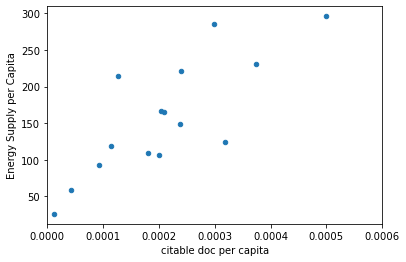

In [13]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['citable doc per capita']=Top15 ['Citable documents'] / Top15 ['population']
    Top15['citable doc per capita']=np.float64(Top15['citable doc per capita'])
    Top15['Energy Supply per Capita']=np.float64(Top15['Energy Supply per Capita'])
    Top15.plot(x='citable doc per capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9() 

Question 10. 

Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [14]:
def answer_ten():
    Top15 = answer_one()
    median=Top15['% Renewable'].median()
    Top15['HighRenew']=[1 if x>=median else 0 for x in Top15['% Renewable']]
    Top15=Top15.sort_values(['Rank'],ascending=True)
    return Top15['HighRenew']

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

Question 11.Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'} This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [15]:
def answer_eleven():
    Top15 = answer_one()
    Top15=Top15.reset_index()
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia',
                 'United Kingdom':'Europe', 'Russian Federation':'Europe', 
                 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 
                 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe',
                 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'} 
    Top15['Continent']=Top15['Country'].replace(to_replace=ContinentDict)
    
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['population']=np.float64(Top15['population'])
    df_summary=Top15.groupby('Continent')['population'].agg([np.size,np.sum,np.mean,np.std])
    return df_summary

answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


Question 12. 

Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups? This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries.

In [16]:
def answer_twelve():
    Top15 = answer_one()
    Top15=Top15.reset_index()

    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia',
                 'United Kingdom':'Europe', 'Russian Federation':'Europe', 
                 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 
                 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe',
                 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'} 
    Top15['Continent'] = [ContinentDict[con] for con in Top15['Country']]
    
    
    Top15['bins%Renewable']=pd.cut(Top15['% Renewable'],5)
    table=Top15.groupby(['Continent','bins%Renewable'])['Country'].agg([np.size]).dropna()
    return table ['size']

answer_twelve()

Continent      bins%Renewable  
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: size, dtype: float64

Question 13. Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results. This function should return a Series PopEst whose index is the country name and whose values are the population estimate string.

In [17]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['population']=Top15['population'].astype(float)
    Top15['population']=Top15['population'].apply('{:,}'.format)
    return  Top15['population']

answer_thirteen()

Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
France                  63,837,349.39759036
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
Iran                    77,075,630.25210084
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
South Korea            49,805,429.864253394
Spain                    46,443,396.2264151
United Kingdom         63,870,967.741935484
United States          317,615,384.61538464
Name: population, dtype: object

Plot a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries',2014 GDP, and the color corresponds to the continent.

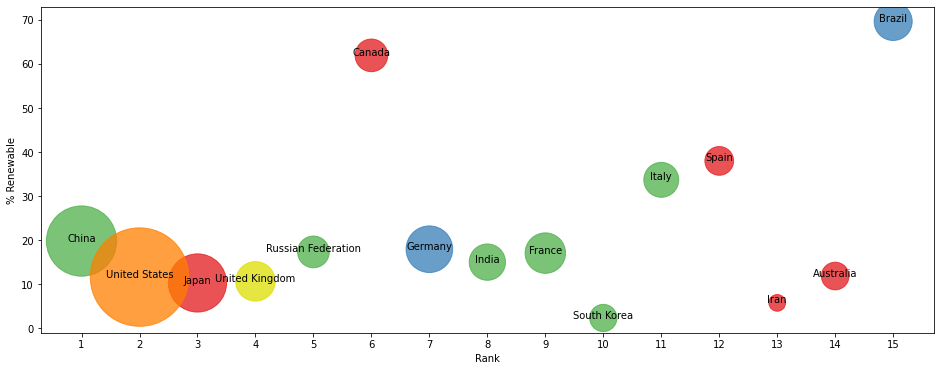

In [18]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

plot_optional()